In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

%matplotlib inline

In [2]:
! wget --no-check-certificate -P ./ -N https://s3.ap-northeast-2.amazonaws.com/mjgim/fmnist_test.csv
! wget --no-check-certificate -P ./ -N https://s3.ap-northeast-2.amazonaws.com/mjgim/fmnist_train.csv

--2018-11-09 11:45:15--  https://s3.ap-northeast-2.amazonaws.com/mjgim/fmnist_test.csv
Resolving s3.ap-northeast-2.amazonaws.com (s3.ap-northeast-2.amazonaws.com)... 52.219.58.65
Connecting to s3.ap-northeast-2.amazonaws.com (s3.ap-northeast-2.amazonaws.com)|52.219.58.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98797998 (94M) [text/csv]
Saving to: ‘./fmnist_test.csv’

100%[======================================>] 98,797,998  63.0MB/s   in 1.5s   

2018-11-09 11:45:16 (63.0 MB/s) - ‘./fmnist_test.csv’ saved [98797998/98797998]

--2018-11-09 11:45:17--  https://s3.ap-northeast-2.amazonaws.com/mjgim/fmnist_train.csv
Resolving s3.ap-northeast-2.amazonaws.com (s3.ap-northeast-2.amazonaws.com)... 52.219.60.0
Connecting to s3.ap-northeast-2.amazonaws.com (s3.ap-northeast-2.amazonaws.com)|52.219.60.0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1099000000 (1.0G) [text/csv]
Saving to: ‘./fmnist_train.csv’

100%[======================

In [3]:
training_data = np.loadtxt('./fmnist_train.csv', delimiter=",")
training_img = training_data[:,1:]
training_lab = training_data[:,0]

test_img = np.loadtxt('./fmnist_test.csv', delimiter=",")

In [7]:
training_img = training_img.reshape(training_img.shape[0], 28, 28)
test_img = test_img.reshape(test_img.shape[0], 28, 28)

In [8]:
print("Training set (images) shape: {shape}".format(shape=training_img.shape))
print("Training set (labels) shape: {shape}".format(shape=training_lab.shape))

print("Test set (images) shape: {shape}".format(shape=test_img.shape))

Training set (images) shape: (56000, 28, 28)
Training set (labels) shape: (56000,)
Test set (images) shape: (14000, 28, 28)


In [10]:
training_img = training_img.astype('float32')/255
test_img = test_img.astype('float32')/255

In [13]:
training_img = training_img.reshape(training_img.shape[0],training_img.shape[1],training_img.shape[2],1)
test_img = test_img.reshape(test_img.shape[0],test_img.shape[1],test_img.shape[2],1)

In [14]:
print("Training set (images) shape: {shape}".format(shape=training_img.shape))
print("Training set (labels) shape: {shape}".format(shape=training_lab.shape))

print("Test set (images) shape: {shape}".format(shape=test_img.shape))

Training set (images) shape: (56000, 28, 28, 1)
Training set (labels) shape: (56000,)
Test set (images) shape: (14000, 28, 28, 1)


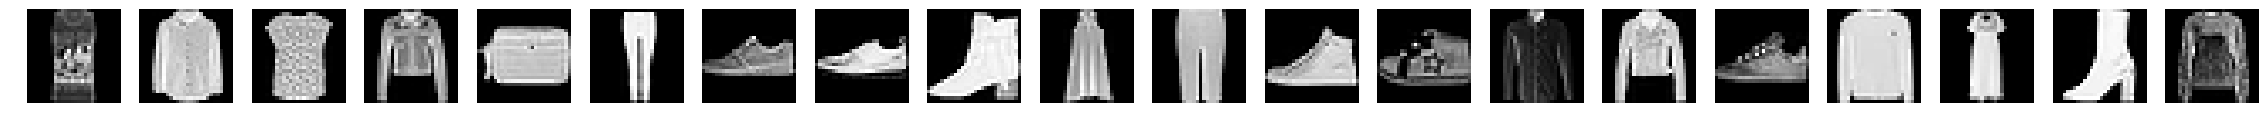

In [15]:
sample_size = 20

idx_s = np.random.randint(0,len(training_img), sample_size)
fig, ax = plt.subplots(1, sample_size, figsize=(sample_size*2, 2))

for i in range(sample_size):
    ax[i].set_axis_off()
    ax[i].imshow(np.reshape(training_img[idx_s][i], [28,28]),cmap="gray")

In [16]:
# Set parameter
 
batch_size = 10
epochs = 5

In [ ]:
model = Sequential()
model.add(Dense(10, input_shape=(784,), activation='softmax'))
model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [26]:
model = Sequential()

# Must define the input shape in the first layer of the neural network
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()
model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)              0         
__________

In [ ]:
train_model = model.fit(training_img, training_lab, epochs=epochs, verbose=2)

Epoch 1/5
 - 76s - loss: 0.5749 - acc: 0.7878
Epoch 2/5
 - 77s - loss: 0.4098 - acc: 0.8517
Epoch 3/5
 - 76s - loss: 0.3694 - acc: 0.8663
Epoch 4/5
 - 76s - loss: 0.3412 - acc: 0.8759
Epoch 5/5


In [ ]:
history = train_model.history
# plot results
hist = train_model.history
acc = hist['acc']
loss = hist['loss']
epochs = range(len(acc))
fig, ax = plt.subplots(1,2, figsize=(14,6))

ax[0].plot(epochs, acc, 'g', label='Training accuracy')
ax[0].set_title('Training accuracy')
ax[0].legend(loc=1)
ax[1].plot(epochs, loss, 'g', label='Training loss')
ax[1].set_title('Training loss')
ax[1].legend(loc=1)
plt.show()

In [ ]:
# result = model.predict_classes(test_img)
# np.savetxt("fmnist_result.csv", result, delimiter=",")